<a href="https://colab.research.google.com/github/vhenequim/CalcNum/blob/main/Resposta_Atividade_de_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  1961, Em plena Guerra Fria, Estados Unidos e União Soviética disputam a supremacia na corrida espacial ao mesmo tempo em que a sociedade norte-americana lida com uma profunda cisão racial, entre brancos e negros, onde negros não podem frequentar mesmos locais que brancos. Tal situação é refletida também na NASA, onde um grupo de matemáticas negras são obrigadas a trabalhar a parte. É lá que estão Katherine Johnson , Dorothy Vaughn  e Mary Jackson , grandes amigas que, além de provar sua competência dia após dia, precisam lidar com o preconceito arraigado para que consigam ascender na hierarquia da NASA.


  Katherine ainda trabalhou para a seção de Controles aeroespaciais, onde calculou a trajetória de voo de Alan Shepard, o primeiro norte-americano no espaço, em 1959. Calculou também a janela de lançamento do Projeto Mercury, em 1961. Katherine plotou cartas de navegação, orientando naves pelas estrelas em caso de falha eletrônica e, em 1962, verificou os primeiros cálculos de computador da órbita de John Glenn ao redor da Terra. Glenn pediu por ela pessoalmente para verificar os números de seu computador de bordo e se recusou a voar até que ela fizesse a verificação.

A história delas é contada num filme de 2016, Hidden Figures.

Considere o problema da órbita de um satélite, cuja posição e velocidade são obtidas como a solução da seguinte equação de estado:

\begin{cases}
x_1' = &x_3(t) \\
x_2' = &x_4(t)\\
x_3' = &-GM_T\dfrac{x_1(t)}{(x_1^2(t) + x_2^2(t))^{3/2}}\\
x_4' = &-GM_T\dfrac{x_2(t)}{(x_1^2(t) + x_2^2(t))^{3/2}}
\end{cases}

onde $G = 6,672 \times 10^{-11} \;\; Nm^2/kg^2$ é constante gravitacional, e $M_T = 5,97 \times 10^{24} \;\; kg$ é a massa da Terra. Observe que $(x_1,x_2)$ e $(x_3,x_4)$ denotam a posição e a velocidade, respectivamente, do satélite no plano que tem a Terra como origem.

 Utilize as  três rotinas $ODE_{Euler}$ , $ODE_{Heun}$  e $ODE_{RK4}$ do material disponibilizado no classroom  para encontrar os caminhos do
satélite com as seguintes posições/velocidades iniciais para um dia.


1. $(x_{10} , x_{20} ) = (4,223 \times 10^7 , 0)[m]$ e $(x_{30} , x_{40} ) = (v_{10} , v_{20} ) =(0, 3071)[m/s]$
2. $(x_{10} , x_{20} ) = (4,223 \times 10^7 , 0)[m]$ e $(x_{30} , x_{40} ) = (v_{10} , v_{20} ) =(0, 3500)[m/s]$
3. $(x_{10} , x_{20} ) = (4,223 \times 10^7 , 0)[m]$ e $(x_{30} , x_{40} ) = (v_{10} , v_{20} ) =(0, 2000)[m/s]$



Alunos:

Vinicius **HENEQUIM** Corrêa - 21059 - A

Enzo Gomes **FRESE** - 21020 - A


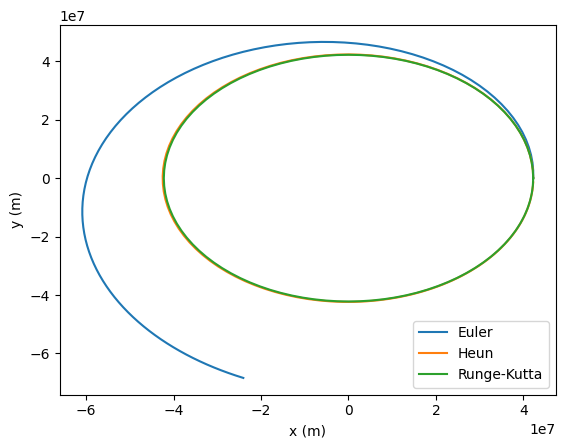

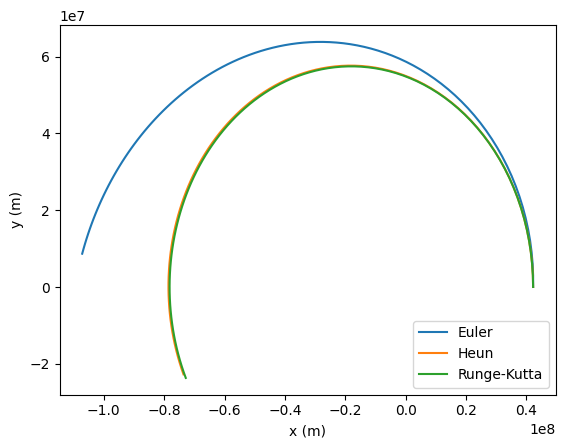

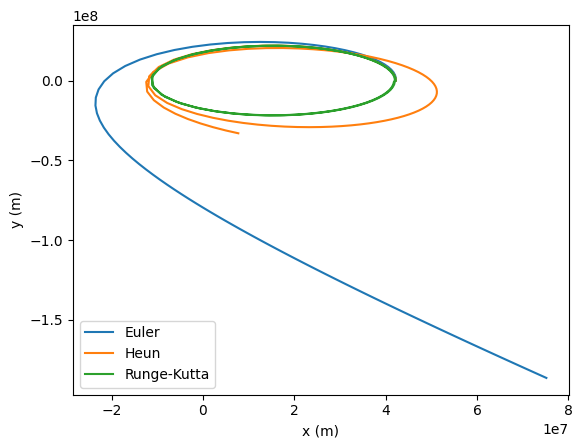

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def EDO(f, initial_value):
    t0 = 0
    tf = 86400  # Um dia em segundos
    s0 = initial_value  # Posições e velocidades iniciais do satélite
    n = 100

    h = (tf - t0) / n
    t = np.arange(t0, tf + h, h)
    s = np.zeros((len(t), len(s0)))
    s[0] = s0

    for i in range(0, len(t) - 1):
        f(h, t, s, i)

    return t, s

def Euler(h, t, s, i):
    s[i + 1] = s[i] + h * F(t[i], s[i])

def Heun(h, t, s, i):
    s[i + 1] = s[i] + h * F(t[i], s[i])
    s[i + 1] = s[i] + (h / 2) * (F(t[i], s[i]) + F(t[i + 1], s[i + 1]))

def RK4(h, t, s, i):
    f1 = h * F(t[i], s[i])
    f2 = h * F(t[i] + h / 2, s[i] + f1 / 2)
    f3 = h * F(t[i] + h / 2, s[i] + f2 / 2)
    f4 = h * F(t[i] + h, s[i] + f3)
    s[i + 1] = s[i] + (f1 + 2 * (f2 + f3) + f4) / 6

def F(t, y):
    G = 6.672e-11  # Aproximação para a constante gravitacional em m^3/(kg*s^2)
    M = 5.97e24  # Massa da Terra em kg
    r = np.sqrt(y[0]**2 + y[1]**2)

    x_dot_dot = -G * M * y[0] / r**3
    y_dot_dot = -G * M * y[1] / r**3

    return np.array([y[2], y[3], x_dot_dot, y_dot_dot])

def plot_graph():
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()

initial_values = np.array([[4.223e7, 0, 0, 3071],
                           [4.223e7, 0, 0, 3500],
                           [4.223e7, 0, 0, 2000]])

for init in initial_values:
    t_euler, y_euler = EDO(Euler, init)
    plt.plot(y_euler[:, 0], y_euler[:, 1], label='Euler')
    t_heun, y_heun = EDO(Heun, init)
    plt.plot(y_heun[:, 0], y_heun[:, 1], label='Heun')
    t_rk4, y_rk4 = EDO(RK4, init)
    plt.plot(y_rk4[:, 0], y_rk4[:, 1], label='Runge-Kutta')
    plot_graph()



